In [4]:
# lets start by getting the data
import csv
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

# Dataset url:
# https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3

data = []

def process(CallNumber,CallType,CallDate,WatchDate, IncidentNumber,
                ReceivedDtTm,EntryDtTm,DispatchDtTm,ResponseDtTm,
                OnSceneDtTm, TransportDtTm, HospitalDtTm,CallFinalDisposition, 
                AvailableDtTm, Address, City, FinalPriority, 
                CallTypeGroup,UnitType, UnitSequenceInCallDispath, FirePreventionDistrict, 
                SupervisorDistrict,NeighborhoodDistrict, Location):
    data.append({
            "CallNumber":CallNumber,
            "CallType":CallType,
            "CallDate":CallDate,
            "WatchDate":WatchDate,
            "IncidentNumber":IncidentNumber,
            
            "ReceivedDtTm":ReceivedDtTm,
            "EntryDtTm":EntryDtTm,
            "DispatchDtTm":DispatchDtTm,
            "ResponseDtTm":ResponseDtTm,
            
            "OnSceneDtTm":OnSceneDtTm,
            "TransportDtTm":TransportDtTm,
            "HospitalDtTm":HospitalDtTm,
            "CallFinalDisposition":CallFinalDisposition,
            
            "AvailableDtTm":AvailableDtTm,
            "Address":Address,
            "City":City,
            "FinalPriority":FinalPriority,
            
            "CallTypeGroup":CallTypeGroup, 
            "UnitType":UnitType,
            "UnitSequenceInCallDispath":UnitSequenceInCallDispath,
            "FirePreventionDistrict":FirePreventionDistrict,
            
            "SupervisorDistrict":SupervisorDistrict,
            "NeighborhoodDistrict":NeighborhoodDistrict,
            "Location":Location
        })

# Fire_Department_Calls_for_Service_2012-2017.csv
# Fire_Department_Calls_for_Service_All.csv
    
with open("csv_files/Fire_Department_Calls_for_Service _2012-2017.csv", "rb") as csvfile:
    reader = csv.DictReader(csvfile,delimiter=",")
    for row in reader:
        CallNumber = row["Call Number"] 
        #UnitID = row["Unit ID"]
        IncidentNumber = row["Incident Number"]
        CallType = row["Call Type"]
        CallDate = row["Call Date"]
        WatchDate = row["Watch Date"]
        ReceivedDtTm = row["Received DtTm"] # Date and time of call is received at the 911 Dispatch Center.
        EntryDtTm = row["Entry DtTm"] # Date and time the 911 operator submits the entry of the initical call information into the CAD system
        DispatchDtTm = row["Dispatch DtTm"] # Date and time the 911 operator dispatches this unit to the call.
        ResponseDtTm = row["Response DtTm"] # Date and time this unit acknowledges the dispatch and records that the unit is en route to the location of the call.
        OnSceneDtTm = row["On Scene DtTm"] # Date and time the unit records arriving to the location of the incident
        TransportDtTm = row["Transport DtTm"] # If this unit is an ambulance, date and time the unit begins the transport unit arrives to hospital
        HospitalDtTm = row["Hospital DtTm"] # If this unit is an ambulance, date and time the unit arrives to the hospital.
        CallFinalDisposition = row["Call Final Disposition"]
        AvailableDtTm = row["Available DtTm"]
        Address = row["Address"]
        City = row["City"] 
        #ZipcodeOfIncident = row["Zipcode of Incident"]
        #Battalion = row["Battalion"]
        #Station Area = row["Station Area"]
        #Box = row["Box"]
        #OriginalPriority = row["Original Priority"]
        #Priority = row["Priority"]
        FinalPriority = row["Final Priority"]
        CallTypeGroup = row["Call Type Group"] #Call types are divided into four main groups: Fire, Alarm, Potential Life Threatening and Non Life Threatening.
        #NumberOfAlarms = row["Number of Alarms"] - Always one so this does not tell us anything
        UnitType = row["Unit Type"]
        UnitSequenceInCallDispath = row["Unit sequence in call dispatch"]
        FirePreventionDistrict = row["Fire Prevention District"]
        SupervisorDistrict = row["Supervisor District"]
        NeighborhoodDistrict = row["Neighborhood  District"]
        Location = row["Location"]
        
        process(CallNumber,CallType,CallDate,WatchDate,IncidentNumber,
                ReceivedDtTm,EntryDtTm,DispatchDtTm,ResponseDtTm,
                OnSceneDtTm, TransportDtTm, HospitalDtTm,
                CallFinalDisposition, AvailableDtTm, Address, City,
                FinalPriority, CallTypeGroup, UnitType, UnitSequenceInCallDispath,
                FirePreventionDistrict, SupervisorDistrict, NeighborhoodDistrict, Location)
     
# Multiple units can be called out for each call therefore multiple lines can be created for each call. 
# We decided to group the data by call number and extract the relevant data.   
    
import cytoolz.curried as tlz

data_grouped = tlz.groupby(lambda x: x['CallNumber'],data)
for d in data_grouped:
    temp = {
        'CallType': "",
        'CallTypeGroup': "",
        'ReceivedDtTm': "",
        'NeighborhoodDistrict': "",
        'Location': "",
        'FinalPriority': -1,
        'CallFinalDisposition': "",
        'CallDate': ""
    }
    for line in data_grouped[d]:
        temp['CallType'] = line['CallType']
        temp['CallTypeGroup'] = line['CallTypeGroup']
        temp['ReceivedDtTm'] = line['ReceivedDtTm']
        temp['NeighborhoodDistrict'] = line['NeighborhoodDistrict']
        temp['Location'] = line['Location']
        temp['FinalPriority'] = line['FinalPriority']
        temp['CallFinalDisposition'] = line['CallFinalDisposition']
        temp['CallDate'] = line['CallDate']
    data_grouped[d] = temp

# Motivation

 - What is your dataset?
 - Why did you choose this/these particular dataset(s)?
 - What was your goal for the end user's experience?

## Data sets

### Fire calls-For-Service

The main data set behind the analysis is the Fire Calls-For-Service dataset from the city of San Francisco. The dataset includes all fire units reponses to calls. Each record includes the call number, incident number, address, unit identifier, call type and disposition. All relevent time intervals are also included in the dataset. Because the dataset is based on responses, and since most calls involve multiple units, there are multiple records for each call number. We decided to focuse on the periods from 2012 to 2017.

Like one can see here above the dataset contains 34 attributes. We only used a subset of those attributes and we will go over them here:

- **Call Number** : A unique 9-digit number assigned by the 911 Dispatch Center (DEM) to this call. These number are used for both Police and Fire calls.
- **Call type** :  type of the call e.g medical incident, outside fire, water rescue......
- **Received DtTm** : Date and time of call is received at the 911 Dispatch Center.
- **On Scene DtTm** : Date and time the unit records arriving to the location of the incident.
- **Call Final Disposition** : Disposition of the call (Code). For example TH2: Transport to Hospital - Code 2, FIR: Resolved by Fire Department .
- **Call Type Group** : Call types are divided into four main groups: Fire, Alarm, Potential Life Threatening and Non Life Threatening.
- **Location** : Location of incident (note: address and location generalized to mid-block of street, intersection or nearest call box location, to protect caller privacy).
- **Neighborhoods** - Analysis Bound : Neighborhood District associated with the call latitud and longitude

### Neighborhood Data 

In the visualization we wanted the user to see more information about each neighborhood. We had a hard time finding open data sets that contained the wanted information and therefore we needed to create our own data set. The neighborhood's information seen in the website was extracted from this [website](http://www.city-data.com/nbmaps/neigh-San-Francisco-California.html). The csv file can be found in this repository under the folder csv_files under the name neighborhood_firecalls_statistic. The data set contains the following attributes

- The **name of the neighborhood**
- **Population density** - People per square mile
- **Area** - in square miles
- **Median household income**
- Ratio of people **below poverty level**
- Ratio of **english speaking persons**
- Ratio of **foreign born residents**


### Fire stations 

We also wanted to visualize the location of all fire stations in San Francisco. To accomplish that we needed to create our own data set with the longitude and latitude of each fire station. The data was taken from this [website](http://sf-fire.org/fire-station-locations). The csv file can be found in this repository under the folder csv_files under the name fire_stations.csv. The data set contains the the following attributes:

- The **number** of the fire station
- The **address** of the fire station 
- The **longitude** of the fire station 
- The **latitude** of the fire station 

### Why and the goal

We chose these data sets because we wanted to explore and see if there was a difference in response time between neighborhoods in San Francisco and visualize it in a responsive geo plot. We wanted to find out if there was any difference in response time between neighborhoods, if the response time was time dependent and if there was a difference between different types of calls e.g fire, life threatening, non life threatening. We added two additional data sets to set the result into perspective by including some information about the neighborhoods and the locations of the fire stations.

TODO tala um Machine learning goal




# Basic stats

- Write about your choices in data cleaning and preprocessing
- Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)


## Data cleaning and preprocessing

- Because the data set is based on responses, and since most calls involve multiple units, there are multiple records for each call number. Before doing the analysis we decided to group the data by call number and extract the relevant data.

- We defined the **response time** as the difference in time from when the call was registered, seen in the attribute Received DtTm, and the time when the first responding unit showed up at the scene, seen in the On Scene DtTm attribute. 

- TODO tala um hvernig distansið var reiknað með einvherri skemmtilegri formúlu.+

## Pre analysis

#### Basic stats for the Calls for Service data set from 1 Januar 2012 to 1 Januar 2017:
 - Size = 592,5 MB 
 - Number of rows = 1423564
 - Number of calls = 649354
 - Number of variables = 34
 
In the pre analysing phase of this project we spent a lot of time figuring out what informations where relevant and what could be used to accomplish our goal. In the following section we will only go through small part of the analysis. We encourage a interested reader to click on the notebook's link here down below to further investigate and read about our analysis. 

-  [Basic stats](pre_analysis_Basic_stats.ipynb)
-  [Heat maps](pre_analysis_heatmap.ipynb)
-  [Magnus 1]()
-  [Magnus 2]()
-  [Magnus 3]()

#### Total number of calls in each neighborhood

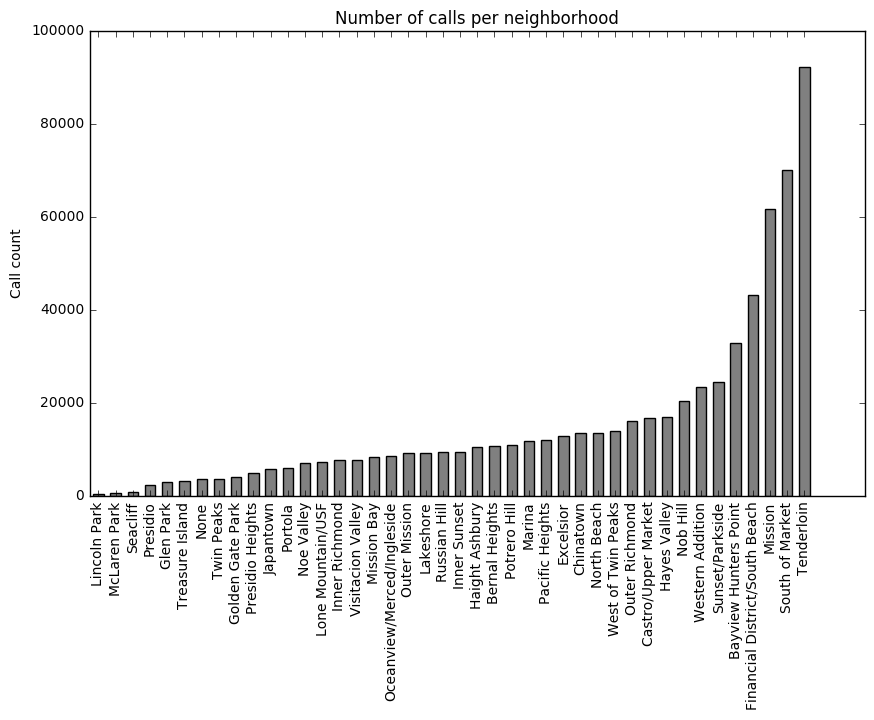

In [5]:
neigborhoodDistrict_count = Counter([line["NeighborhoodDistrict"] for line in data_grouped.values()])
neigborhoodDistrict_count = sorted(neigborhoodDistrict_count.items(), key=lambda i: i[1])

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
x = [key for key,_ in neigborhoodDistrict_count] 
y = [value for _,value in neigborhoodDistrict_count] 

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.xticks(rotation=90)
plt.title("Number of calls per neighborhood")
plt.ylabel("Call count")
plt.show()

#### Total number of calls per call type groups

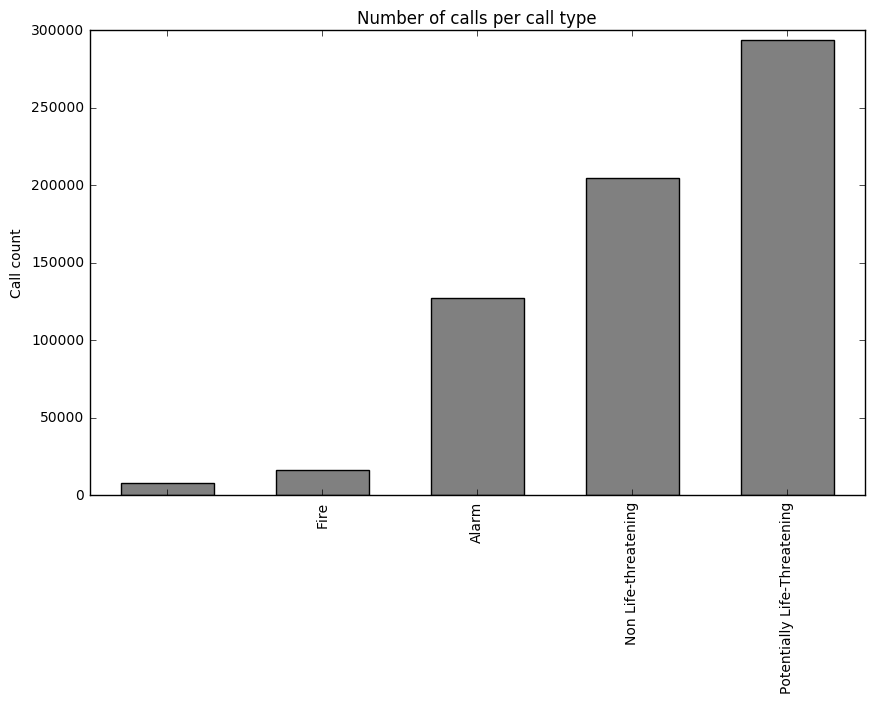

In [6]:
calltypesGroup_count = Counter([line["CallTypeGroup"] for line in data_grouped.values()])
calltypesGroup_count = sorted(calltypesGroup_count.items(), key=lambda i: i[1])

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
x = [key for key,_ in calltypesGroup_count] 
y = [value for _,value in calltypesGroup_count] 

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.xticks(rotation=90)
plt.title("Number of calls per call type")
plt.ylabel("Call count")
plt.show()

####  Total number of calls for each hour of the day

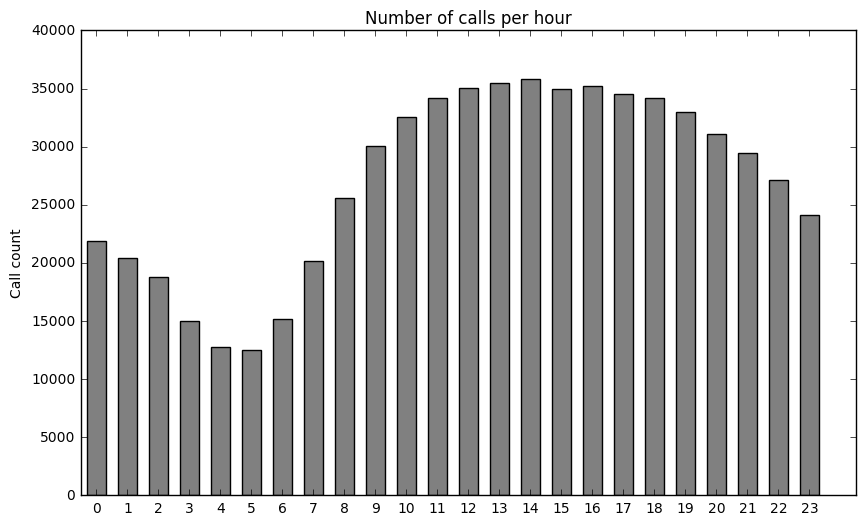

In [7]:
from datetime import datetime

def changeFromAmPm_to_hours(time):
    time = " ".join(time.split(" ")[1:])
    time = datetime.strptime(time, '%I:%M:%S %p')
    return str(time.hour)

numberOfCalls_perHour =  Counter([int(changeFromAmPm_to_hours(line["ReceivedDtTm"])) for line in data_grouped.values()]).items()
x = [key for key,_ in numberOfCalls_perHour] 
y = [value for _,value in numberOfCalls_perHour] 

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.title("Number of calls per hour")
plt.ylabel("Call count")
plt.show()

# Theory

- Describe which machine learning tools you use and why the tools you've chosen are right for the problem you're solving.
- Talk about your model selection. How did you split the data in to test/training. Did you use cross validation?
- Explain the model performance. How did you measure it? Are your results what you expected



MAGNUS Skrifa þennan kafla

# Visualizations

- Explain the visualizations you've chosen.
- Why are they right for the story you want to tell?

 Our goal was to in investigate if the response time of the Fire department of San Francisco was neighborhood dependent (location dependent)

# Discussion 

- What went well?,
- What is still missing? What could be improved?, Why?